In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/GOTHICI.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
 
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/GOTHICI.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

plt.rc("font", family = "C:/Windows/Fonts/GOTHICI.TTF")
sns.set(font="GOTHICI", 
rc={"axes.unicode_minus":False}, style='darkgrid')

sns.set(font="C:/Windows/Fonts/GOTHICI.TTF", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

import os

In [7]:
kospi = pd.read_csv('c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/코스피_지수.csv', index_col=0)
kospi.head(2)

시가        고가        저가        종가         5        10        20  \
일자                                                                             
Jun-22  2,670.74  2,681.51  2,457.39  2,492.97  2,666.15  2,785.03  2,920.78   
May-22  2,669.21  2,702.10  2,546.80  2,685.90  2,700.22  2,855.66  2,909.49   

              60       120         거래량            5.1           10.1  \
일자                                                                     
Jun-22  2,455.57  2,232.96   5,049,316  13,693,706.00  13,203,008.90   
May-22  2,453.89  2,227.63  16,868,003  14,868,966.60  14,078,170.20   

                 20.1           60.1          120.1  
일자                                                   
Jun-22  19,306,200.15  13,469,627.08  10,582,847.43  
May-22  19,839,013.15  13,510,203.27  10,602,958.75

In [8]:
kospi_5 = kospi[['5']]

In [9]:
kospi_5.dropna(inplace=True)

In [10]:
kospi_5['5'] = kospi_5['5'].apply(lambda x:x.replace(',',''))

In [11]:
kospi_5['5'] = kospi_5['5'].astype('float64')

In [12]:
kospi_5 = kospi_5[::-1]

In [13]:
kospi_5.reset_index(drop=False, inplace=True)

In [14]:
kospi_5['일자'] = kospi_5['일자'].apply(lambda x:np.nan if x.split('-')[1] > '23' else x)
kospi_5.dropna(inplace=True)

In [15]:
kospi_5['일자'] = kospi_5['일자'].apply(lambda x:x if x.split('-')[1] > '19' else np.nan)
kospi_5.dropna(inplace=True)

In [16]:
kospi_5.set_index('일자', inplace=True)

ValueError: x and y must have same first dimension, but have shapes (30, 1) and (2,)

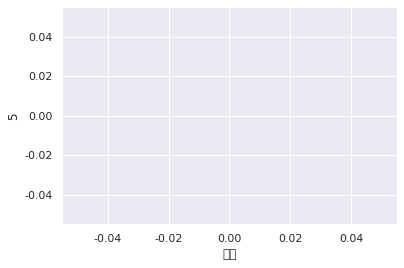

In [18]:
plt.plot(figsize=(15,5))
plt.xlabel('일자')
plt.ylabel('5')
a = kospi_5
x = [0, 0]
y = [0, 100]

# 직선을 그린 예시, (0, 0)과 (0, 100)을 잇는 선 그래프
plt.plot(a, x, y)
plt.show()

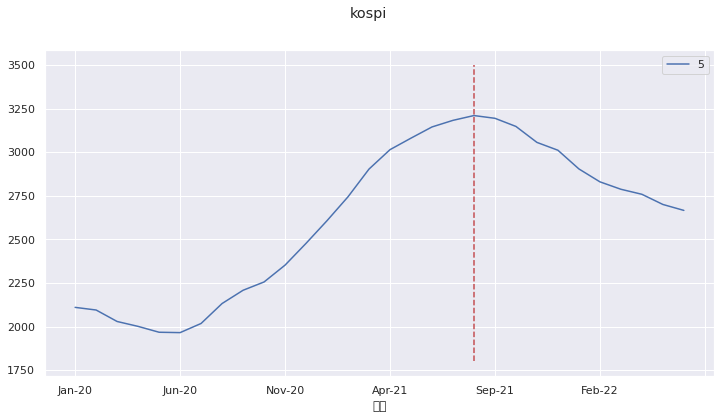

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
kospi_5.plot(ax=ax);
ax.vlines(19, 1800, 3500, linestyle='--', color='r', label='Start of Forecast');
plt.suptitle('kospi')
plt.show()

In [138]:
kospi_5 = kospi_5['Aug-21':]

In [139]:
kospi_5.columns = ['kospi_5']

In [140]:
kospi_5

kospi_5
일자             
Aug-21  3210.01
Sep-21  3194.20
Oct-21  3147.55
Nov-21  3056.02
Dec-21  3011.09
Jan-22  2903.90
Feb-22  2829.97
Mar-22  2787.37
Apr-22  2758.57
May-22  2700.22
Jun-22  2666.15

In [168]:
files = os.listdir('c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/')

In [190]:
kospi_df = pd.DataFrame()
for file in files[:]:
    kospi = pd.read_csv(f'c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/{file}', index_col=0)
    name = file.split('_')[0]
#     print(name)
#     print(f'{file.split('-')[0]}_5')

    kospi_5 = kospi[['5']]
    kospi_5.columns = [f'{name}_5']

    kospi_5 = kospi_5[::-1]
    kospi_5.reset_index(drop=False, inplace=True)

    kospi_5.iloc[:,0] = kospi_5.iloc[:,0].apply(lambda x:np.nan if x.split('-')[1] > '23' else x)
    kospi_5.dropna(inplace=True)
    kospi_5.iloc[:,0] = kospi_5.iloc[:,0].apply(lambda x:x if x.split('-')[1] > '19' else np.nan)
    kospi_5.dropna(inplace=True)

    kospi_5.set_index('일자', inplace=True)

    kospi_5 = kospi_5['Aug-21':]
    
    try:
        kospi_5.iloc[:,0] = kospi_5.iloc[:,0].apply(lambda x:x.replace(',',''))
        kospi_5.iloc[:,0] = kospi_5.iloc[:,0].astype('float64')
    except:
        kospi_5.iloc[:,0] = kospi_5.iloc[:,0].astype('float64')
    
    kospi_df = pd.concat([kospi_df, kospi_5], axis=1)

In [191]:
kospi_df

건설업_5   금융업_5     기계_5      보험_5  비금속광물_5   서비스업_5  섬유의복_5   운수장비_5  \
일자                                                                             
Aug-21  134.62  470.36  1225.08  14322.58  2844.83  2068.98  424.64  2323.31   
Sep-21  135.21  470.19  1233.82  14534.29  2886.57  2085.77  441.10  2303.11   
Oct-21  132.86  465.47  1220.88  14489.25  2874.06  2090.87  463.77  2264.66   
Nov-21  126.85  456.20  1164.01  14144.33  2849.24  2034.63  470.82  2165.37   
Dec-21  122.75  450.73  1138.40  13951.06  2811.19  1984.14  487.76  2127.03   
Jan-22  116.94  436.06  1090.58  13808.12  2691.42  1860.96  485.86  2066.23   
Feb-22  113.46  426.12  1072.83  13513.92  2566.33  1794.65  492.51  2020.46   
Mar-22  112.95  422.34  1054.25  13689.13  2542.42  1736.12  481.25  1971.17   
Apr-22  114.47  419.64  1071.73  14054.56  2545.45  1661.38  476.71  1986.26   
May-22  113.15  415.95  1065.14  14230.46  2518.15  1583.61  462.09  1976.90   
Jun-22  112.05  412.10  1068.56  14178.34  2530.73  1551.00  448.59  1973.09   

         운수창고_5   유통업_5  ...     의약품_5  전기가스업_5    전기전자_5    제조업_5  종이목재_5  \
일자                       ...                                                 
Aug-21  2519.63  434.63  ...  18721.30   818.33  30209.66  8077.31  470.34   
Sep-21  2524.34  431.41  ...  18972.57   834.03  29739.22  8000.84  461.14   
Oct-21  2421.84  420.82  ...  18753.01   830.49  29093.91  7860.82  448.98   
Nov-21  2257.88  402.18  ...  18560.23   809.92  28442.11  7631.15  426.93   
Dec-21  2170.83  390.30  ...  18344.95   801.39  28496.23  7544.37  411.76   
Jan-22  2021.31  373.89  ...  16900.87   787.24  28092.26  7317.17  397.55   
Feb-22  1962.15  363.51  ...  16045.98   782.55  27772.84  7142.96  391.59   
Mar-22  1979.24  360.10  ...  15731.77   781.07  27685.62  7039.41  391.21   
Apr-22  2049.84  365.67  ...  15325.25   801.89  27290.05  6973.98  402.36   
May-22  2096.85  364.88  ...  14902.26   815.78  26341.24  6812.42  403.51   
Jun-22  2147.53  367.79  ...  14909.94   833.89  25607.13  6707.39  404.09   

           증권_5   철강금속_5    코스피_5   통신업_5     화학_5  
일자                                                  
Aug-21  2195.34  5560.41  3210.01  421.46  7564.66  
Sep-21  2174.95  5484.34  3194.20  429.28  7472.54  
Oct-21  2159.43  5357.88  3147.55  425.20  7380.87  
Nov-21  2124.25  5130.30  3056.02  418.27  7025.82  
Dec-21  2120.44  4887.33  3011.09  416.53  6780.62  
Jan-22  2076.73  4680.30  2903.90  414.71  6484.47  
Feb-22  2061.54  4577.40  2829.97  407.43  6162.98  
Mar-22  2049.36  4586.28  2787.37  410.38  5891.61  
Apr-22  2040.47  4744.02  2758.57  416.95  5831.92  
May-22  2007.34  4823.17  2700.22  422.40  5779.54  
Jun-22  1963.85  4844.80  2666.15  426.01  5773.70  

[11 rows x 23 columns]

In [192]:
kospi_df.columns

Index(['건설업_5', '금융업_5', '기계_5', '보험_5', '비금속광물_5', '서비스업_5', '섬유의복_5',
       '운수장비_5', '운수창고_5', '유통업_5', '은행_5', '음식료품_5', '의료정밀_5', '의약품_5',
       '전기가스업_5', '전기전자_5', '제조업_5', '종이목재_5', '증권_5', '철강금속_5', '코스피_5',
       '통신업_5', '화학_5'],
      dtype='object')

In [193]:
kospi_df = kospi_df[['코스피_5', '건설업_5', '금융업_5', '기계_5', '보험_5', '비금속광물_5', '서비스업_5', '섬유의복_5',
       '운수장비_5', '운수창고_5', '유통업_5', '은행_5', '음식료품_5', '의료정밀_5', '의약품_5',
       '전기가스업_5', '전기전자_5', '제조업_5', '종이목재_5', '증권_5', '철강금속_5',
       '통신업_5', '화학_5']]

In [ ]:
files = os.listdir('c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/')

kospi_df = pd.DataFrame()
for file in files[:1]:
    kospi = pd.read_csv(f'c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/{file}', index_col=0)
    name = file.split('_')[0]
#     print(name)
#     print(f'{file.split("-")[0]}_5')

    kospi_5 = kospi[['5']]
    kospi_5.columns = [f'{name}_5']

    kospi_5 = kospi_5[::-1]
    kospi_5.reset_index(drop=False, inplace=True)

    kospi_5.iloc[:,0] = kospi_5.iloc[:,0].apply(lambda x:np.nan if x.split('-')[1] > '23' else x)
    kospi_5.dropna(inplace=True)
    kospi_5.iloc[:,0] = kospi_5.iloc[:,0].apply(lambda x:x if x.split('-')[1] > '19' else np.nan)
    kospi_5.dropna(inplace=True)

    kospi_5.set_index('일자', inplace=True)

    kospi_5 = kospi_5['Aug-21':]
    
    try:
        kospi_5.iloc[:,0] = kospi_5.iloc[:,0].apply(lambda x:x.replace(',',''))
        kospi_5.iloc[:,0] = kospi_5.iloc[:,0].astype('float64')
    except:
        kospi_5.iloc[:,0] = kospi_5.iloc[:,0].astype('float64')
    
    kospi_df = pd.concat([kospi_df, kospi_5], axis=1)
    
kospi_df = kospi_df[['코스피_5', '건설업_5', '금융업_5', '기계_5', '보험_5', '비금속광물_5', '서비스업_5', '섬유의복_5',
       '운수장비_5', '운수창고_5', '유통업_5', '은행_5', '음식료품_5', '의료정밀_5', '의약품_5',
       '전기가스업_5', '전기전자_5', '제조업_5', '종이목재_5', '증권_5', '철강금속_5',
       '통신업_5', '화학_5']]

In [194]:
# kospi_df.to_csv('c:/Users/bitcamp/Desktop/final_data/업종별/업종지수/월봉_21_8.csv')

In [206]:
kospi_corr_df = kospi_df.corr()

In [208]:
kospi_corr_df = kospi_corr_df[['코스피_5']]

In [217]:
kospi_corr_df.reset_index(drop=False, inplace=True)
kospi_corr_df.columns = ['업종', 'kospi']

In [230]:
kospi_corr_df.sort_values(by=['kospi'])

업종     kospi
7    섬유의복_5 -0.419609
15  전기가스업_5  0.346384
21    통신업_5  0.349331
4      보험_5  0.524969
13   의료정밀_5  0.596333
9    운수창고_5  0.843766
20   철강금속_5  0.849781
18   종이목재_5  0.875944
12   음식료품_5  0.890343
10    유통업_5  0.948501
16   전기전자_5  0.954856
3      기계_5  0.960248
5   비금속광물_5  0.964626
1     건설업_5  0.971464
14    의약품_5  0.977247
8    운수장비_5  0.978528
6    서비스업_5  0.978629
11     은행_5  0.979900
19     증권_5  0.985212
22     화학_5  0.992914
2     금융업_5  0.997373
17    제조업_5  0.998766
0     코스피_5  1.000000

In [231]:
kospi_corr_df.sort_values(by=['kospi'], ascending=False)

업종     kospi
0     코스피_5  1.000000
17    제조업_5  0.998766
2     금융업_5  0.997373
22     화학_5  0.992914
19     증권_5  0.985212
11     은행_5  0.979900
6    서비스업_5  0.978629
8    운수장비_5  0.978528
14    의약품_5  0.977247
1     건설업_5  0.971464
5   비금속광물_5  0.964626
3      기계_5  0.960248
16   전기전자_5  0.954856
10    유통업_5  0.948501
12   음식료품_5  0.890343
18   종이목재_5  0.875944
20   철강금속_5  0.849781
9    운수창고_5  0.843766
13   의료정밀_5  0.596333
4      보험_5  0.524969
21    통신업_5  0.349331
15  전기가스업_5  0.346384
7    섬유의복_5 -0.419609

<AxesSubplot:>

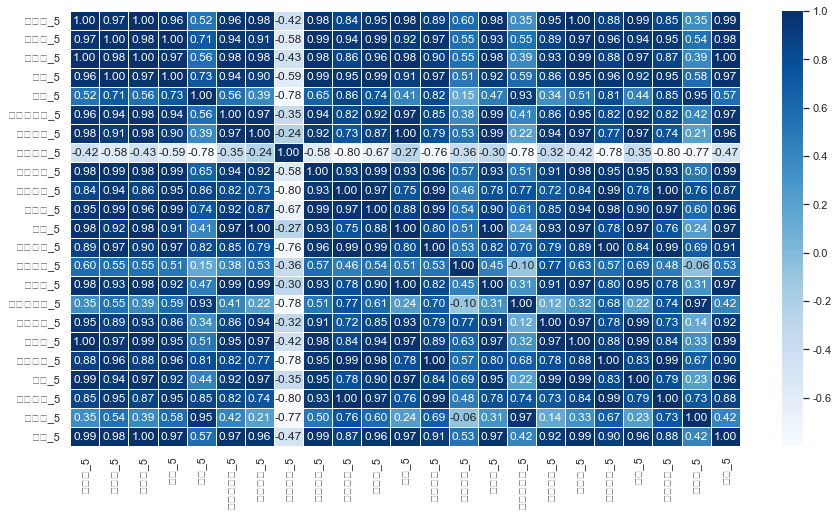

In [285]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data = kospi_df.corr(), annot=True, fmt = '.2f', linewidths=.5 , cmap='Blues')

In [244]:
kospi_corr_index = kospi_corr_df.set_index('업종')

<AxesSubplot:xlabel='업종'>

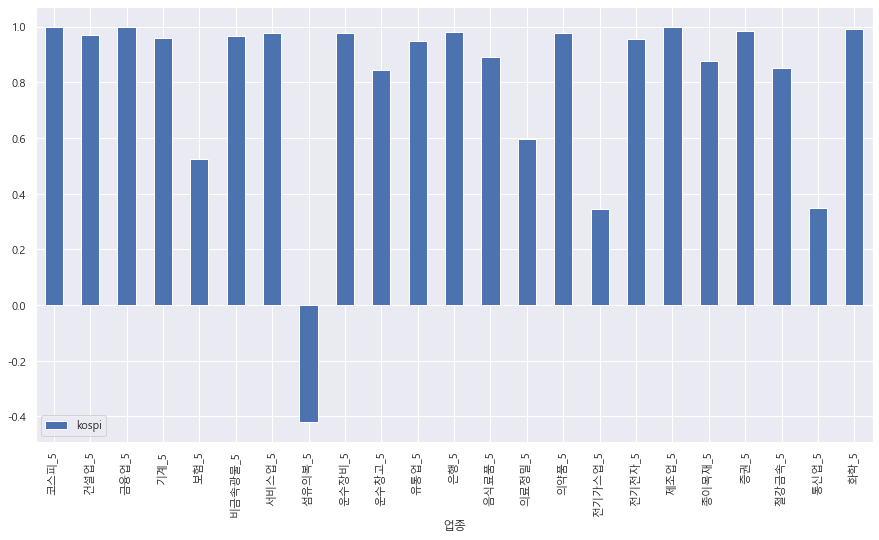

In [259]:
kospi_corr_index.plot(kind='bar')

In [260]:
kospi_corr_index

kospi
업종               
코스피_5    1.000000
건설업_5    0.971464
금융업_5    0.997373
기계_5     0.960248
보험_5     0.524969
비금속광물_5  0.964626
서비스업_5   0.978629
섬유의복_5  -0.419609
운수장비_5   0.978528
운수창고_5   0.843766
유통업_5    0.948501
은행_5     0.979900
음식료품_5   0.890343
의료정밀_5   0.596333
의약품_5    0.977247
전기가스업_5  0.346384
전기전자_5   0.954856
제조업_5    0.998766
종이목재_5   0.875944
증권_5     0.985212
철강금속_5   0.849781
통신업_5    0.349331
화학_5     0.992914

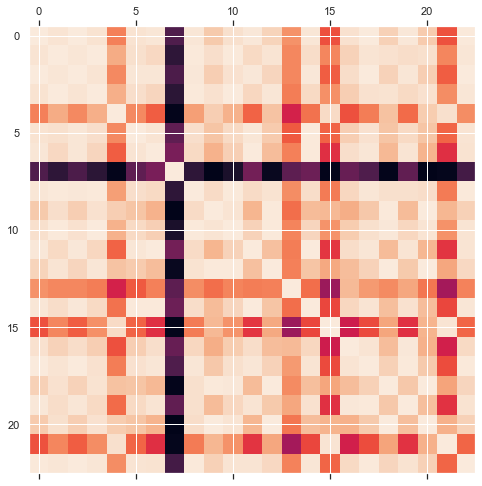

In [275]:
plt.matshow(kospi_df.corr()) 